In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [12]:
df = pd.read_csv("Datasets/algerian_forest_fires_cleaned_no_time_series.csv")

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

### Splitting into independent and dependent features

In [17]:
X = df.drop(['FWI', 'Classes'], axis=1)
y = df['FWI']

In [18]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [19]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

### Train, test, split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train.shape, X_test.shape

((182, 10), (61, 10))

## Feature Selection bases on correlation

In [24]:
corr = X_train.corr()

### Check for Multicollinearity

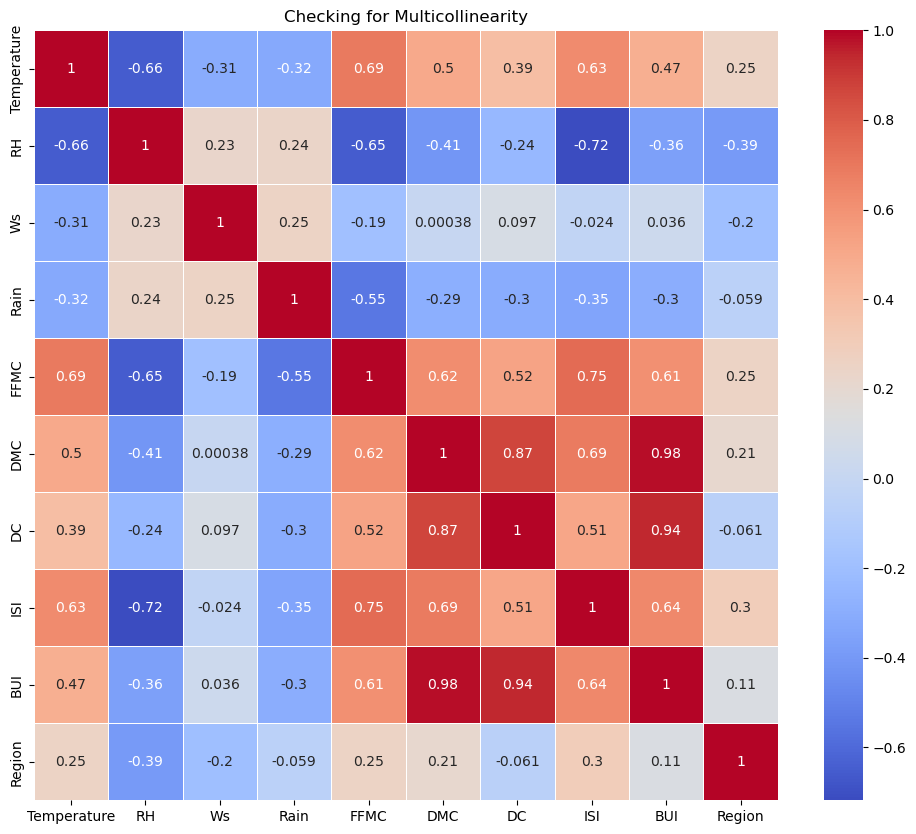

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Checking for Multicollinearity")
plt.show()

In [26]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000


In [75]:
# find features with high correlation
def correlation(corr, threshold):
    # Get the upper triangle of the correlation matrix
    upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    # Find features with correlation above threshold or below -threshold
    high_corr = upper_triangle[(upper_triangle > threshold) | (upper_triangle < -threshold)]
    
    # Filtering out rows with high correlation
    high_corr.dropna(axis=0, how='all', inplace=True)
    
    # Get the feature names with high correlation
    high_corr_features = high_corr.index.tolist()

    return high_corr_features

In [77]:
# threshold = 0.85
high_corr_features = correlation(corr, 0.85)

DMC and DC have high correlations with other features

In [ ]:
# Dropping independent features with high correlations
X_train.drop(high_corr_features, axis=1, inplace=True)
X_test.drop(high_corr_features, axis=1, inplace=True)

In [81]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'ISI', 'BUI', 'Region'], dtype='object')